## Homework 1 Report - Nisha Lad

### Exercise 1 - The Collatz Map

In [1]:
import numpy as np, matplotlib.pyplot as plt
from exercise1 import collatz
%matplotlib inline

In [2]:
#Create an array for the stopping times for each Collatz sequence
stoppingTime = []
for i in range(1, 5001, 1):
    seq = collatz(i)
    stoppingTime.append(len(seq) - 1)

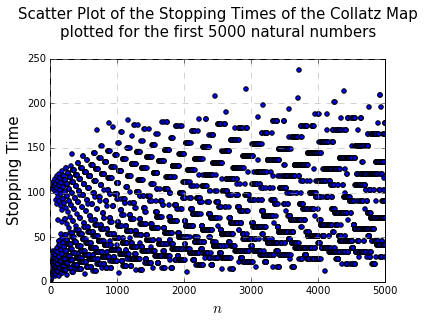

In [3]:
#Make an array of integer values 
#Plot against the corresponding stopping times
integer_n = np.arange(1, 5001, 1)
plt.scatter(integer_n, stoppingTime, c='blue')
plt.grid(b=True, which='both', color='0.65', linestyle='--')
plt.xlabel('$n$', size = 15)
plt.ylabel('Stopping Time', size = 15)
plt.xlim(0, 5000)
plt.ylim(0, 250)
plt.title('Scatter Plot of the Stopping Times of the Collatz Map\n' 
          'plotted for the first 5000 natural numbers\n', size = 15)

The Collatz conjecture states that no matter which n is an element of the natural numbers you begin with, the sequence of integers n_k will be finite and end with the number one. From the image above by testing the first 5000 natural numbers we can infer that the Collatz Conjecture is valid, as within the first 5000 natural numbers there are the majority of different cases of numbers tested. I.e. the first 5000 natural numbers contain odd, even, prime, square and cube numbers, which have all been tested to give a finite stopping time as they all eventuall end with a sequence of (...4, 2, 1). Therefore we can infer that the Conjecture is true. It does seem more likely if we plot the stopping times for larger n.

We can see from the graph above that there exists a pattern amongst the natural numbers and their stopping times grouping several consecutive natural numbers together with a similar stopping time, before a number is reached with a stopping time much higher than its surrounding natural numbers. Hence, by plotting the stopping time for larger n, we would see this pattern to continue and the stopping time would increase further.

However, by simply testing the first 5000 natural numbers we cannot sufficiently conclude that the Collatz is true for all natural numbers, as there may exist an infinite Collatz sequence for a particular n_k which takes an infinite stopping time to reach one. I.e. this sequence contains a loop such that C(a0) = a1, C(a1) = a2,.....C(aq) = a0. In this example we enter an infinite loop within the Collatz map in which case we would never reach 1 and hence the stopping time would be infinite. In this case the Collatz conjecture would be false, however up to present there has not been such a number that has been found to produce an infinite sequence within the Collatz map.

From analysing this graph, it predicts that for plotting the stopping time for larger n, this pattern of grouping consecutive number stopping times together before reaching a number with a much greater stopping time, would continue for larger n and hence a larger stopping time. However, it is not easy to predict from this graph whether a loop would occur for a certain natural number, and hence give rise to  the Conjecture being false.

### Exercise 2 - The Gradient Descent Algorithm

In [4]:
from exercise2 import gradient_step

In [5]:
def plotCosine(mySigma): 
    """Function calculates the points needed to plot gradient descent
    
    Parameters
    ----------
    mySigma : float
              convergence threshold used within gradient_step method
         
    Returns
    -------
    xpoints : numpy array 
              array of points generated by gradient_step
    ypoints : numpy array
              array of points to be plotted as function to find local minimum
    """

    f = lambda x : np.cos(x)
    df = lambda x : -1.0*np.sin(x)

    # Catch and plot the gradient descent points of Cos(x)
    x_k1 = 0.1
    x_k = 1.1
    xpoints = np.array([x_k])
    while (abs(x_k1 - x_k) > 1e-8):
        x_k = x_k1
        xpoints = np.append(xpoints, x_k)
        x_k1 = gradient_step(x_k, df, sigma=mySigma)

    ypoints = np.array([])
    for i in range(0, len(xpoints), 1):
        ypoints = np.append(ypoints, f(xpoints[i]))

    return xpoints, ypoints

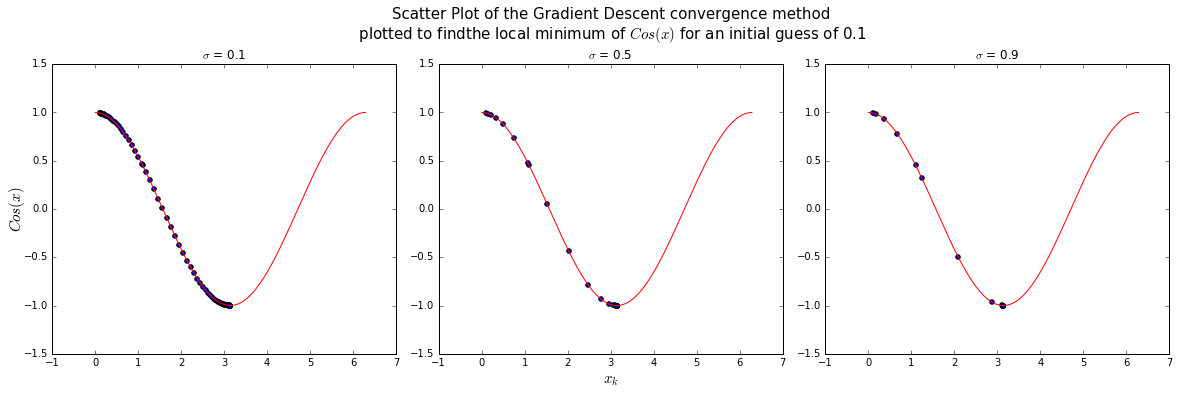

In [6]:
x = np.linspace(0, 2*np.pi, 200)
y = np.cos(np.linspace(0, 2*np.pi, 200))
fig = plt.figure(figsize=(17, 6))

plt.title('Scatter Plot of the Gradient Descent convergence method\n plotted to find' 
          'the local minimum of $Cos(x)$ for an initial guess of 0.1\n', size = 15)

ax = fig.add_subplot(111) # the big subplot
# Turn off axis lines and ticks of the big subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')

sub1 = fig.add_subplot(131)
xpoints, ypoints = plotCosine(0.1)
sub1.set_title('$\sigma$ = 0.1')
sub1.scatter(xpoints, ypoints)
sub1.plot(x, y, color='r')

sub2 = fig.add_subplot(132)
xpoints, ypoints = plotCosine(0.5)
sub2.set_title('$\sigma$ = 0.5')
sub2.scatter(xpoints, ypoints)
sub2.plot(x, y, color='r')

sub3 = fig.add_subplot(133)
xpoints, ypoints = plotCosine(0.9)
sub3.set_title('$\sigma$ = 0.9')
sub3.scatter(xpoints, ypoints)
sub3.plot(x, y, color='r')

ax.set_xlabel('$x_k$', size = 15)
ax.set_ylabel('$Cos(x)$', size = 15)

plt.tight_layout()
plt.show()

From the graph above we can see that by choosing an appropriate sigma value and an appropriate intial guess, the gradient_descent() method corerctly obtains an appropriate value for a local minima in the interval (0, 2$\pi$). However, sensible values of sigma need to be chosen, as sigma determines the proportion of the next step and hence the next iteration of our function to find the local minima. Therefore, if we choose a value of sigma to be too small, the convergence rate will be slow, as the steps in gradient descent are too small along the function. However, if sigma is too big, then the approximation is overestimated and we overshoot the value of the local minimum point. Hence, we choose must an approppriate step size in order to obtain a convergence rate which will produce an accurate local minimum point. The algorithm for the current gradient_step() and gradient_descent() can be improved in order to obtain a higher precision value of the local minima.

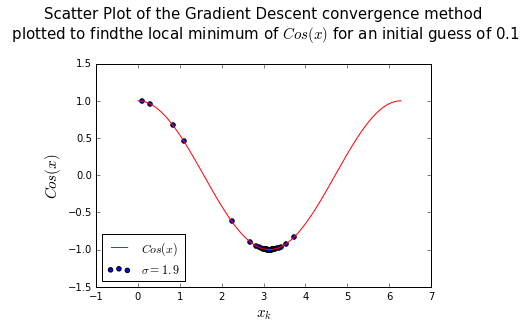

In [7]:
x = np.linspace(0, 2*np.pi, 200)
y = np.cos(np.linspace(0, 2*np.pi, 200))
xpoints, ypoints = plotCosine(1.9)
plt.title('Scatter Plot of the Gradient Descent convergence method\n plotted to find' 
          'the local minimum of $Cos(x)$ for an initial guess of 0.1\n', size = 15)

plt.scatter(xpoints, ypoints, label='$\sigma = 1.9$')
plt.plot(x, y, color='r', label='$Cos(x)$')
plt.legend(loc='best')
plt.xlabel('$x_k$', size = 15)
plt.ylabel('$Cos(x)$', size = 15)

When setting sigma > 1 we see that the gradient descent method still obtains a value for the local minimum, however as the proportion of the step is now greater than one we first overshoot the  local minimum point when descending down the function, and hence we oscillate either side of the local minimum until we reach a stop. This is due to the fact the sigma value is overestimated. The time elapsed when choosing a value of sigma > 1 also increases exponentially, and hence the run time for this code increases as sigma increases, due to this iteration method oscillating about the minimum point as a result of it overshooting the local minimum on its first descent. Therefore, we must choose an appropriate sigma value. 0 $<= \sigma <=$ 1.

If sigma was chosen to be incredibly large, even though the run time for this program would be extremely long, I predict that this should not be a problem for periodic functions such as sine(x) and cosine(x) as the gradient descent method should overshoot one minima and hence converge to the next minima (if the domain was extended to be larger that (0, $2\pi$). However, this would take an extremely long time to run.

### Exercise 3 - The Jacobi and Gauss-Seidel Iteration Methods

In [8]:
from exercise3 import jacobi_iteration, gauss_seidel_iteration

In [9]:
#Create matrix A
Neg5 = np.diag([-5 for x in range(32)])
OffDiag1 = np.diag(np.ones(31), k=1) + np.diag(np.ones(31), k=-1)
OffDiag2 = np.diag(np.ones(30), k=2) + np.diag(np.ones(30), k=-2)
A = Neg5 + OffDiag1 + OffDiag2

In [10]:
def jacobi_points(myEpsilon=1e-8):
    """Function calculates residual in solving linear matrix problems
    using the jacobi iteration method.
    
    Parameters
    ----------
    myEpsilon : float
                convergence threshold used within jacobi_iteration method
         
    Returns
    -------
    jacobi_residual : numpy array 
                      array of residual points as solution converges
    """
    b = np.sin(10*np.linspace(-1,1,32));
    jacobi_residual = []
    x0 = np.ones(32)
    for i in range(0, 32):
        xk = jacobi_iteration(A, b, x0, epsilon=myEpsilon)
        rk = b - np.dot(A, xk)
        norm_rk = np.linalg.norm(rk, 1)
        jacobi_residual.append(norm_rk)
        x0 = xk
    return jacobi_residual

In [11]:
def Gauss_Seidel_points(myEpsilon=1e-8):
    """Function calculates residual in solving linear matrix problems
    using the gauss-seidel iteration method.
    
    Parameters
    ----------
    myEpsilon : float
                convergence threshold used within gauss_seidel_iteration method
         
    Returns
    -------
    GS_residual : numpy array 
                  array of residual points as solution converges
    """
    b = np.sin(10*np.linspace(-1,1,32));
    GS_residual = []
    x0 = np.ones(32)
    for i in range(0, 32):
        xk = gauss_seidel_iteration(A, b, x0, epsilon=myEpsilon)
        rk = b - np.dot(A, xk)
        norm_rk = np.linalg.norm(rk, 1)
        GS_residual.append(norm_rk)
        x0 = xk
    return GS_residual

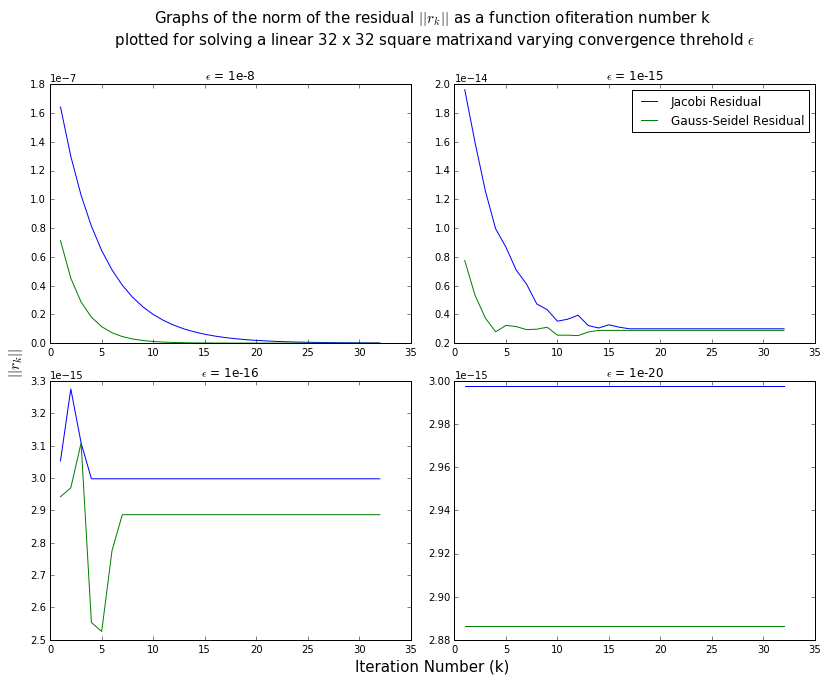

In [12]:
ittr = np.linspace(1, 32, 32)
fig = plt.figure(figsize=(12, 10))

plt.title('Graphs of the norm of the residual $||r_k||$ as a function of' 
          'iteration number k\n plotted for solving a linear 32 x 32 square matrix'
          'and varying convergence threhold $\epsilon$\n\n', size = 15)

ax = fig.add_subplot(111) # the big subplot
# Turn off axis lines and ticks of the big subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')

sub1 = fig.add_subplot(221)
sub1.set_title('$\epsilon$ = 1e-8')
sub1.plot(ittr, jacobi_points(), label='Jacobi Residual')
sub1.plot(ittr, Gauss_Seidel_points(), label='Gauss-Seidel Residual')

sub2 = fig.add_subplot(222)
sub2.set_title('$\epsilon$ = 1e-15')
sub2.plot(ittr, jacobi_points(myEpsilon=1e-15), label='Jacobi Residual')
sub2.plot(ittr, Gauss_Seidel_points(myEpsilon=1e-15), label='Gauss-Seidel Residual')
plt.legend(loc='best')

sub3 = fig.add_subplot(223)
sub3.set_title('$\epsilon$ = 1e-16')
sub3.plot(ittr, jacobi_points(myEpsilon=1e-16), label='Jacobi Residual')
sub3.plot(ittr, Gauss_Seidel_points(myEpsilon=1e-16), label='Gauss-Seidel Residual')

sub4 = fig.add_subplot(224)
sub4.set_title('$\epsilon$ = 1e-20')
sub4.plot(ittr, jacobi_points(myEpsilon=1e-20), label='Jacobi Residual')
sub4.plot(ittr, Gauss_Seidel_points(myEpsilon=1e-20), label='Gauss-Seidel Residual')

ax.set_xlabel('Iteration Number (k)', size = 15)
ax.set_ylabel('$||r_k||$', size = 15)

plt.tight_layout()
plt.show()

As you can see from the plots above, the Gauss-Seidal iteration method converges much more rapidly than the Jacobi iteration method. This is valid, given the number of operations needed to calculate each iteration within both the Jacobi and Gauss-Seidel methods, and hence we predict that the Gauss-Seidel method should converge to the approximate solution with fewer number of iterations in comparison to the Jacobi method.

As we decrease the convergence threshold $\epsilon$ from 10^(-8) to 10^-(15) to 10^-(20), we see that these numerical methods using iterative processes to solve matrix equations start to break down. The approximations to solving the equation Ax = b (both the Jacobi and Gauss-Seidel methods) are no longer valid as they begin to collape. We see that the norm of rk begins to change throughout the iteration process from decreasing at an exponential rate to remaining constant as the approximation breaks down, and hence does not converge to a appropriate solution.